In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

<h3> Decompose Time Series Into Trend, Seasonal and Noise Components </h3>

A time series can be thought of as being made of 3 components:
1. Seasonal component
2. Trend component
3. Noise component

<h3> Load Dataset </h3>

In [2]:
mydateparser = lambda x: datetime.strptime(x, '%d-%m-%y')
data = pd.read_csv('datasets/retail_sales_used_car_dealers_us_1992_2020.csv', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)

/var/folders/tz/v33gryt93199dy6v1pqb0g1w0000gn/T/ipykernel_1643/3446857045.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('datasets/retail_sales_used_car_dealers_us_1992_2020.csv', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)


In [3]:
data.head()

,Retail_Sales
DATE,
1992-01-01,1744
1992-02-01,1990
1992-03-01,2177
1992-04-01,2601
1992-05-01,2171


<h3> Decompose Time Series </h3>

In [4]:
components = seasonal_decompose(data['Retail_Sales'], model='multiplicative')

<h3> Plot Time Series & Its Components </h3>

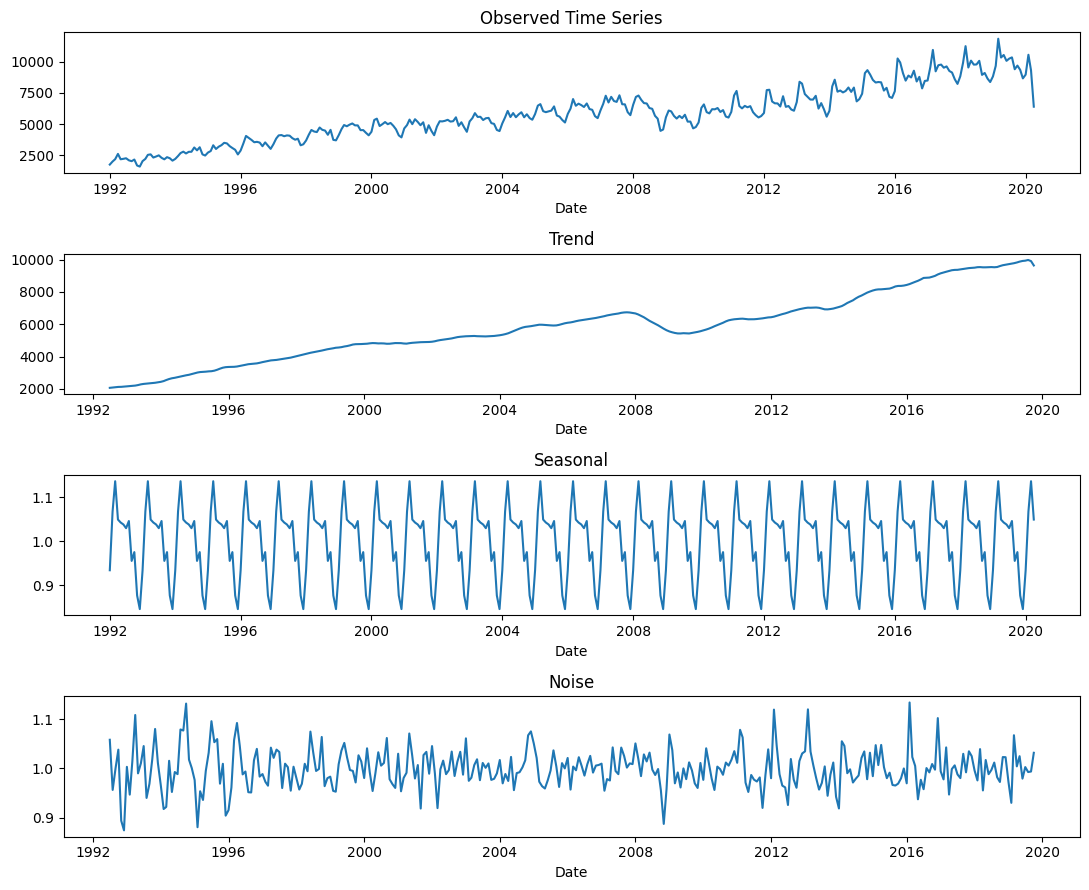

In [5]:
fig, axes = plt.subplots(4, 1, figsize=(11, 9))

# Plot 'Time Series' 
axes[0].plot(components.observed)
axes[0].set_title('Observed Time Series')
axes[0].set_xlabel('Date')

# Plot 'USEU' returns
axes[1].plot(components.trend)
axes[1].set_title('Trend')
axes[1].set_xlabel('Date')

# Plot 'USEU' returns
axes[2].plot(components.seasonal)
axes[2].set_title('Seasonal')
axes[2].set_xlabel('Date')

# Plot 'USEU' returns
axes[3].plot(components.resid)
axes[3].set_title('Noise')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show() 